# **Performance Metrics for Regression Problems**

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/martinwg/ISA591/main/data/Customer_LTV.csv')
df.head()

,CustomerID,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
0,12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
1,12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
2,12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
3,12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
4,12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [2]:
## Set the variable CustomerID as an index
df.set_index('CustomerID', inplace = True)

In [3]:
df.head()

,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5,CLV_3M
CustomerID,,,,,,,,,,,,,
12346.0,0.00,0.000,77183.600,0.00,0.0,0.0,1.0,0.0,0.00,0.00,77183.60,0.00,0.00
12347.0,584.91,509.385,475.390,711.79,1.0,2.0,1.0,1.0,584.91,1018.77,475.39,711.79,1294.32
12348.0,310.00,367.000,227.440,892.80,1.0,1.0,1.0,1.0,310.00,367.00,227.44,892.80,0.00
12350.0,0.00,0.000,334.400,0.00,0.0,0.0,1.0,0.0,0.00,0.00,334.40,0.00,0.00
12352.0,316.25,0.000,312.362,0.00,2.0,0.0,5.0,0.0,632.50,0.00,1561.81,0.00,311.73


In [4]:
## X Matrix and y vector
X = df.drop('CLV_3M', axis = 1)
y = df.CLV_3M

<Axes: >

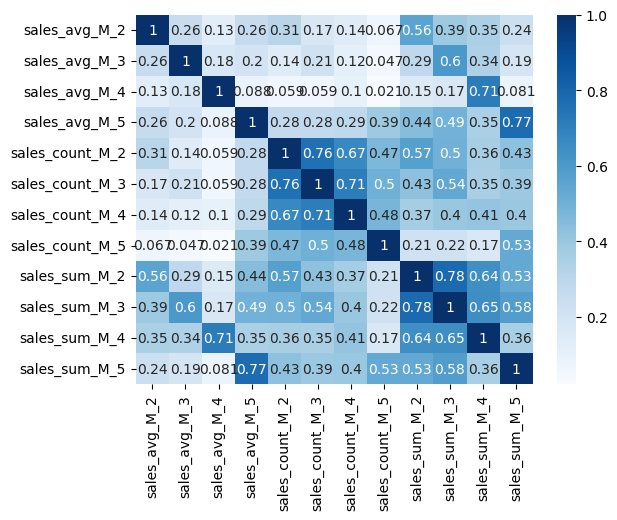

In [6]:
## Correlation Plot
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = X.corr()
sns.heatmap(corrmat, cmap = "Blues", annot = True)

In [7]:
## Split the data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 591)

## **Linear Regression (first-order)**

In [12]:
import statsmodels.api as sm

In [14]:
## X Matrix
sm.add_constant(X_train)

,const,sales_avg_M_2,sales_avg_M_3,sales_avg_M_4,sales_avg_M_5,sales_count_M_2,sales_count_M_3,sales_count_M_4,sales_count_M_5,sales_sum_M_2,sales_sum_M_3,sales_sum_M_4,sales_sum_M_5
CustomerID,,,,,,,,,,,,,
14520.0,1.0,0.000,0.000000,165.00,0.000000,0.0,0.0,1.0,0.0,0.00,0.00,165.00,0.00
13579.0,1.0,0.000,0.000000,0.00,164.700000,0.0,0.0,0.0,1.0,0.00,0.00,0.00,164.70
15661.0,1.0,0.000,0.000000,154.90,0.000000,0.0,0.0,2.0,0.0,0.00,0.00,309.80,0.00
15407.0,1.0,0.000,287.865000,165.00,0.000000,0.0,2.0,1.0,0.0,0.00,575.73,165.00,0.00
15665.0,1.0,0.000,1121.005000,0.00,0.000000,0.0,2.0,0.0,0.0,0.00,2242.01,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17062.0,1.0,0.000,0.000000,102.64,145.243333,0.0,0.0,1.0,3.0,0.00,0.00,102.64,435.73
16626.0,1.0,191.170,303.713333,795.75,0.000000,5.0,3.0,1.0,0.0,955.85,911.14,795.75,0.00
13055.0,1.0,434.775,344.860000,0.00,0.000000,2.0,1.0,0.0,0.0,869.55,344.86,0.00,0.00


In [15]:
## instance and the fit
model1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [17]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                 CLV_3M   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     446.3
Date:                Mon, 09 Oct 2023   Prob (F-statistic):               0.00
Time:                        20:57:21   Log-Likelihood:                -21780.
No. Observations:                2531   AIC:                         4.359e+04
Df Residuals:                    2518   BIC:                         4.366e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -28.1104     36.449     

In [18]:
## How does it predict the test data set?
## new data?
yhat_model1 = model1.predict(sm.add_constant(X_test))

## **Neural Network**

In [21]:
from sklearn.neural_network import MLPRegressor

## instance
nn = MLPRegressor(max_iter = 1000)

## fit and predict
yhat_model2 = nn.fit(X_train, y_train).predict(X_test)

In [22]:
yhat_model2

array([ 89.40363183, 441.53035582,  39.92157562, ..., 203.73714837,
        54.2447566 , 315.70521979])

## **Performance Metrics (Comparison)**

In [23]:
## import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [33]:
## mean squared error
## adv: a common metric
## disadv: squared units
print(f'Regression MSE is: ${mean_squared_error(y_test, yhat_model1)}')
print(f'NN MSE is: ${mean_squared_error(y_test, yhat_model2)}')

Regression MSE is: $^21509455.6337571454
NN MSE is: $^23775086.2717197984


In [35]:
## mean absolute error
## adv: in the same units of y, not affected (as much) by outliers
## not as common as squared unit metrics
print(f'Regression MAE is: ${mean_absolute_error(y_test, yhat_model1)}')
print(f'NN MAE is: ${mean_absolute_error(y_test, yhat_model2)}')

Regression MAE is: $391.91288003267374
NN MAE is: $485.6544308042947


In [36]:
## root mean squared error
## adv: same units as y
## disadv: affected by outliers
print(f'Regression RMSE is: ${mean_squared_error(y_test, yhat_model1, squared = False)}')
print(f'NN RMSE is: ${mean_squared_error(y_test, yhat_model2, squared = False)}')

Regression RMSE is: $1228.5990532949086
NN RMSE is: $1942.9581240262999


In [40]:
## mean absolute percentage error
## adv: % error
## disadv: not as common
print(f'Regression MAPE is: {mean_absolute_percentage_error(y_test, yhat_model1)}')
print(f'NN MAPE is: {mean_absolute_percentage_error(y_test, yhat_model2)}')

Regression MAPE is: 4.941154358603257e+17
NN MAPE is: 5.111940384471772e+17


You can use plots to visualize performance

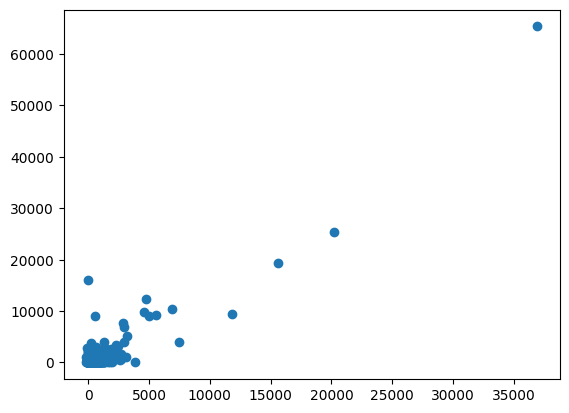

In [41]:
## scatter of prediction vs response is helpful
plt.scatter(yhat_model1, y_test)

In [42]:
df_test = X_test.copy()

In [43]:
df_test['LR_prediction'] = yhat_model1
df_test['NN_prediction'] = yhat_model2
df_test['True CLTV'] = y_test

In [44]:
## If you have an index variable
import plotly.express as px
fig = px.scatter(df_test, x = 'LR_prediction', y = 'True CLTV', color = df_test.index)
fig.show()

In [45]:
## If you have an index variable
import plotly.express as px
fig = px.scatter(df_test, x = 'NN_prediction', y = 'True CLTV', color = df_test.index)
fig.show()